## Understanding the Transformer

1. Data Preprocessing 
2. Model
3. etc

### 1. Data Preprocessing

In [1]:
import sys
sys.path.append('/home/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/src')
from preprocessing import *

path = "/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL{year}_ml_inputs/{dataset}.parquet"

datasets = [
    'ttH_HToInvisible_M125',
    'TTToSemiLeptonic',
]

years = ['2018']

files = [
    path.format(year=year, dataset=dataset)
    for dataset in datasets
    for year in years
]

## Data preprocessing ##
df = load_from_parquet(files)   

2025-01-27 14:23:27,630 - INFO - Loading data from 2 parquet files...
2025-01-27 14:23:27,631 - INFO - Reading file: /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/ttH_HToInvisible_M125.parquet
2025-01-27 14:23:30,091 - INFO - /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/ttH_HToInvisible_M125.parquet contains 266650 events
2025-01-27 14:23:30,204 - INFO - Filtered df contains 144551 events from regions [0]
2025-01-27 14:23:30,403 - INFO - Reading file: /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/TTToSemiLeptonic.parquet
2025-01-27 14:23:51,961 - INFO - /cephfs/dice/projects/CMS/Hinv/ml_datasets_ul/UL2018_ml_inputs/TTToSemiLeptonic.parquet contains 2468208 events
2025-01-27 14:23:52,408 - INFO - Filtered df contains 437503 events from regions [0]
2025-01-27 14:23:55,003 - INFO - DataFrame loaded successfully with 582054 entries.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582054 entries, 0 to 2468207
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   event                                      582054 non-null  uint64 
 1   region                                     582054 non-null  int32  
 2   Generator_weight                           582054 non-null  float32
 3   Generator_scalePDF                         582054 non-null  float32
 4   Generator_x1                               582054 non-null  float32
 5   Generator_x2                               582054 non-null  float32
 6   Generator_xpdf1                            582054 non-null  float32
 7   Generator_xpdf2                            582054 non-null  float32
 8   cleanedJet_pt                              582054 non-null  object 
 9   cleanedJet_eta                             582054 non-null  object 
 10  cleanedJet_p

In [3]:
df.describe()


,event,region,Generator_weight,Generator_scalePDF,Generator_x1,Generator_x2,Generator_xpdf1,Generator_xpdf2,InputMet_pt,InputMet_phi,ncleanedJet,ncleanedBJet,HT,MHT_pt,MHT_phi,weight_nominal,xs_weight,Pred
count,5.820540e+05,582054.0,582054.000000,582054.000000,582054.000000,582054.000000,582054.0,582054.0,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,582054.000000,5.820540e+05,5.820540e+05,582054.000000
mean,1.891719e+08,0.0,223.361618,156.501358,0.125897,0.126528,0.0,0.0,275.347290,0.090632,5.947771,1.677753,636.637695,277.087830,0.075261,4.542481e-07,5.897727e-07,0.438268
std,1.647319e+08,0.0,138.289032,138.366104,0.105920,0.106160,0.0,0.0,76.845116,1.757408,1.142200,0.659897,251.309052,76.166527,1.770001,3.440853e-07,3.200354e-07,0.228673
min,3.200000e+01,0.0,-303.359375,0.894440,0.003564,0.002585,0.0,0.0,200.125000,-3.140625,5.000000,1.000000,267.013062,200.000122,-3.141573,-2.685515e-06,-7.731120e-07,0.036702
25%,5.823806e+06,0.0,0.502533,60.654297,0.049160,0.049616,0.0,0.0,225.625000,-1.369141,5.000000,1.000000,469.341003,227.272560,-1.409650,1.313396e-07,8.747137e-08,0.250979
50%,1.679402e+08,0.0,303.359375,111.820312,0.093178,0.093723,0.0,0.0,252.125000,0.161743,6.000000,2.000000,572.433655,255.797363,0.135708,4.782974e-07,7.731120e-07,0.394042
75%,3.347099e+08,0.0,303.359375,209.226562,0.170044,0.170807,0.0,0.0,299.500000,1.564453,7.000000,2.000000,729.773590,301.436020,1.571372,6.715300e-07,7.731120e-07,0.593833
max,4.999998e+08,0.0,303.359375,2367.125000,0.955475,0.970032,0.0,0.0,1731.000000,3.140625,14.000000,7.000000,4760.846680,1669.724976,3.141572,5.862152e-06,7.731120e-07,0.992995


In [4]:
print(df["cleanedJet_btagDeepFlavB"])

0          [0.96777344, 0.9980469, 0.028625488, 0.0177307...
1          [0.6479492, 0.0045547485, 0.05001831, 0.006172...
2          [0.013267517, 0.9379883, 0.018295288, 0.038665...
4          [0.104003906, 0.005504608, 0.003545761, 0.0263...
5          [0.99658203, 0.19006348, 0.03161621, 0.0026378...
                                 ...                        
2468186    [0.009918213, 0.9536133, 0.015060425, 0.519042...
2468188    [0.07672119, 0.0017538071, 0.014953613, 0.0122...
2468189    [0.035949707, 0.08935547, 0.7246094, 0.9848633...
2468198    [0.0079956055, 0.96435547, 0.0029144287, 0.922...
2468207    [0.01197052, 0.002494812, 0.017730713, 0.10546...
Name: cleanedJet_btagDeepFlavB, Length: 582054, dtype: object


In [5]:
df = remove_negative_events(df) # This removes events with negative weight_nominals
df["target"] = create_target_labels(df["dataset"]) # This creates the target labels where 1 = ttH_HtoInvisible_M125 and 0 = other: will need to change this for multi classifcation
apply_reweighting_per_class(df) # This applies the reweighting to the dataset to balance the classes

reweighting = torch.Tensor(df['weight_training'].values) # Store the reweighting in a tensor, 

df["target"] = create_target_labels(df["dataset"])

2025-01-27 14:23:57,373 - INFO - Negative events = 7515 [1.29%]...
2025-01-27 14:23:57,861 - INFO - Negatively weighted events removed
2025-01-27 14:23:58,218 - INFO - Applying reweighting using variable: weight_nominal
2025-01-27 14:23:58,244 - INFO - Reweighting process '1' with factor: 58502108
2025-01-27 14:23:58,254 - INFO - Process '1' updated. Sum of 'weight_nominal': 0.00982, Sum of 'weight_training': 574539
2025-01-27 14:23:58,255 - INFO - Reweighting process '0' with factor: 2230937
2025-01-27 14:23:58,275 - INFO - Process '0' updated. Sum of 'weight_nominal': 0.25753, Sum of 'weight_training': 574539


In [ ]:
df

In [6]:
# Now we deal with the awkward size jet arrays, these range in length from 5-14
# We pad them to a fixed length and convert them to tensors, this function uses multiprocessing to speed up the process

# First, seperate the array into chunks using split_dataframe()
# Then, apply the function to each chunk using process_chunk()
# ['pt','eta','phi','mass','area','btagDeepFlavB'] are the features/columns we want to keep
# Then is outputs the padded arrays and the target labels as tensors

X, y, pad_mask = awkward_to_inputs_parallel(df, n_processes=8, target_length=10) # Keeping first 10 jets


2025-01-22 09:19:51,423 - INFO - Converting awkward arrays to inputs [target_length=10]...
2025-01-22 09:21:21,939 - INFO - Arrays padded and clipped to target length: 10


In [7]:
# The X is a tensor with 10 columns, 1 for each jet in the events, and within each jet there are 6 features
# Missing values are padded with 0
# The y tensor is the target labels
# The pad_mask is a tensor with the same shape as X, with True where there is a value and False where there is a padding (no value)
print(X.shape)
print(y.shape)
print(pad_mask.shape)

torch.Size([574539, 10, 6])
torch.Size([574539, 1])
torch.Size([574539, 10])


In [8]:
event_level = get_event_level(df) 
# This retrieves the event-level features from the orignal dataframe. In this case-InputMet_pt which is sum of momenta aka missing momentum in the event

In [9]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

## Create training datasets ##
train_X, val_X, train_y, val_y, train_weights, val_weights, train_mask, val_mask, train_event, val_event = train_test_split(
    X, 
    y, 
    reweighting, 
    pad_mask, 
    event_level, 
    test_size=0.2,  
    random_state=42,
)

train_dataset = TensorDataset(train_X, train_y, train_weights, train_mask, train_event)
valid_dataset = TensorDataset(val_X, val_y, val_weights, val_mask, val_event)

## Create loaders ##
batch_size = 1024

train_loader = DataLoader(
    dataset = train_dataset, 
    batch_size = batch_size, 
    shuffle = True, 
)
valid_loader = DataLoader(
    dataset = valid_dataset, 
    batch_size = 10000, # can use larger batches for the GPU 
    shuffle = False, 
    #num_workers = 20,
)
# NOTE : in a jupyter notebook it is not possible to use `num_workers` dues to multiprocessing issues.
# Use this notebook for testing and experimenting, but to benefit from multiprocessing batch loading, you will need the python scripts


In [10]:
print(train_X.shape)
train_X_p = train_X.permute(0,2,1)
print(train_X_p.shape)

torch.Size([459631, 10, 6])
torch.Size([459631, 6, 10])


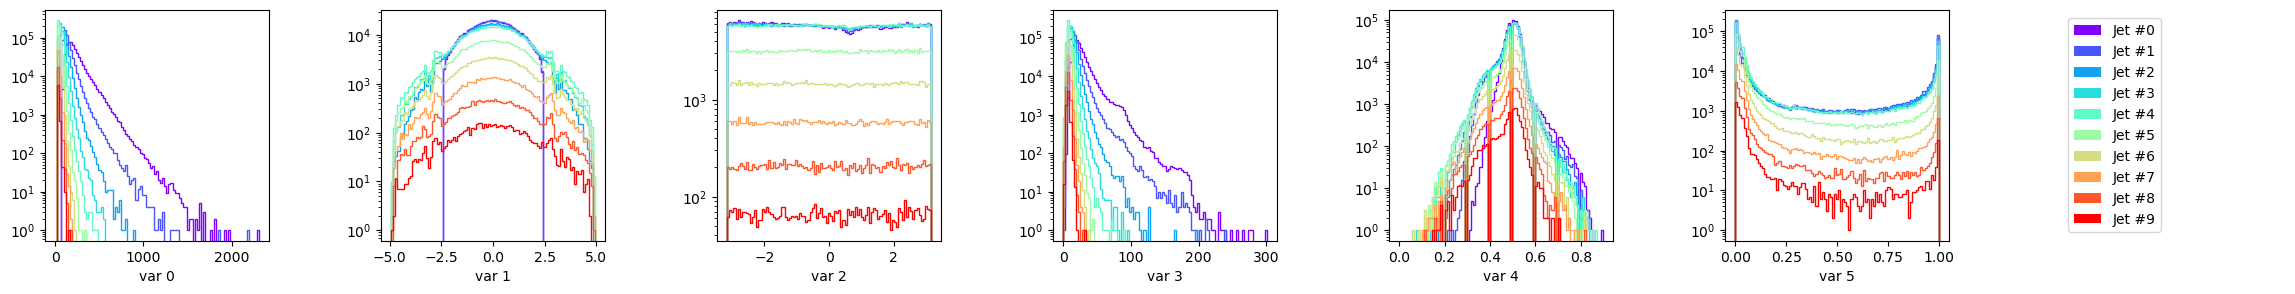

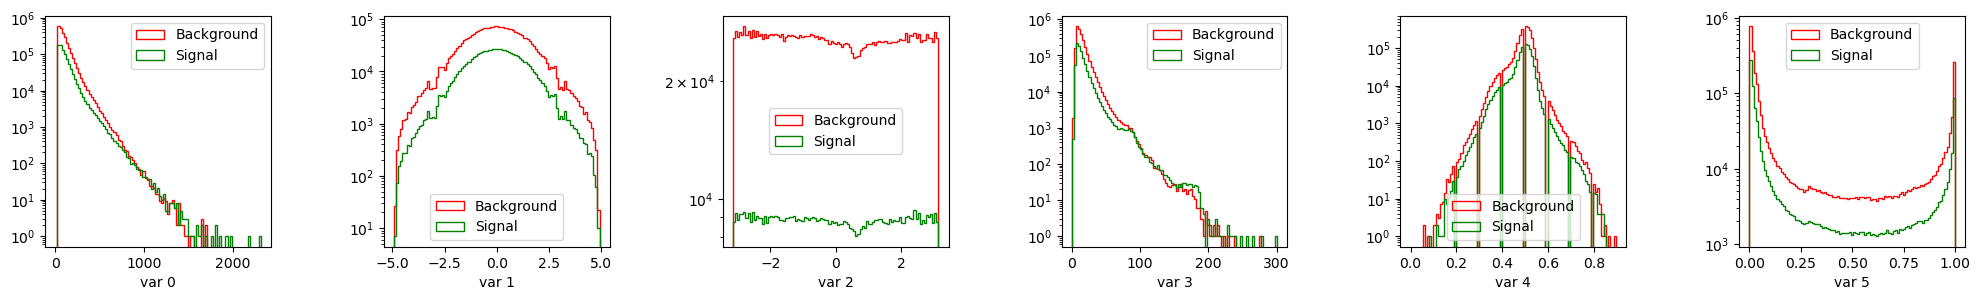

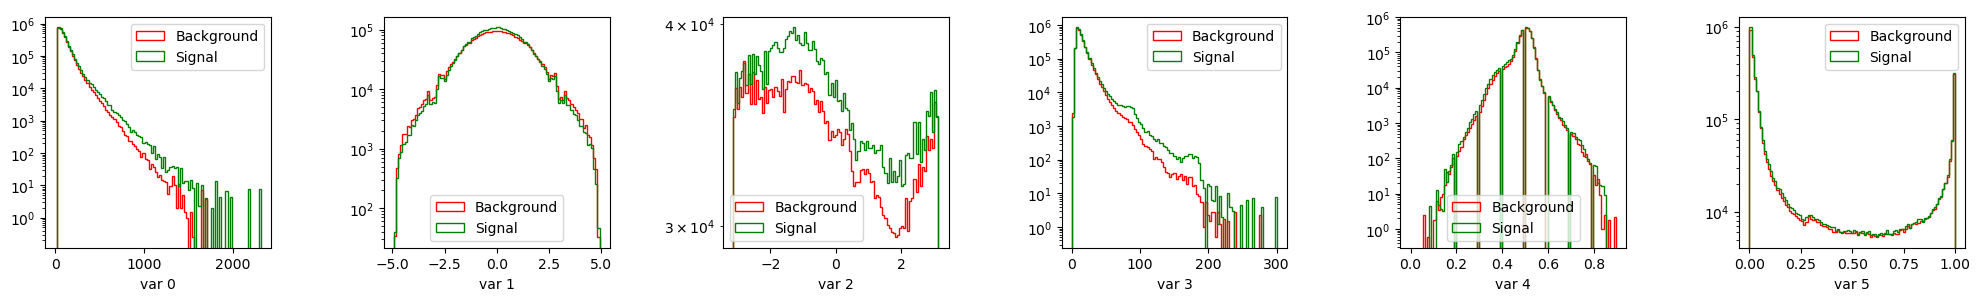

In [11]:
from plotting import *

# We now plot all the jets, then the background vs signal, then the background vs signal with reweighting
fig = plot_inputs_per_multiplicity(X,y,pad_mask,bins=100,log=True,show=True)
fig = plot_inputs_per_label(X,y,pad_mask,bins=100,log=True,show=True)
fig = plot_inputs_per_label(X,y,pad_mask,bins=100,weights=reweighting,log=True,show=True)

(array([8.44834616e-04, 9.96879328e-04, 1.07701579e-03, 9.08449850e-04,
        7.85569595e-04, 7.06734969e-04, 6.34027650e-04, 5.35820753e-04,
        4.67363160e-04, 4.07999568e-04, 3.48462829e-04, 2.94418769e-04,
        2.57079885e-04, 2.12998237e-04, 1.87175234e-04, 1.55171134e-04,
        1.34670486e-04, 1.17406144e-04, 1.00663263e-04, 8.44781381e-05,
        6.74773006e-05, 6.58447887e-05, 5.34091095e-05, 4.93923818e-05,
        4.30344112e-05, 3.41925315e-05, 2.82606595e-05, 2.63109142e-05,
        2.41417143e-05, 2.24420563e-05, 1.87151571e-05, 1.40199403e-05,
        1.12400798e-05, 1.08273424e-05, 1.13808135e-05, 7.46347653e-06,
        9.43261519e-06, 6.76021329e-06, 7.32991162e-06, 6.87808565e-06,
        5.60105312e-06, 3.74899841e-06, 4.45834131e-06, 3.24399662e-06,
        3.39348070e-06, 2.79508424e-06, 2.36480380e-06, 1.71696149e-06,
        1.40373112e-06, 1.78846627e-06, 1.05266844e-06, 1.49034291e-06,
        7.59552388e-07, 4.29113208e-07, 1.56464701e-06, 6.721062

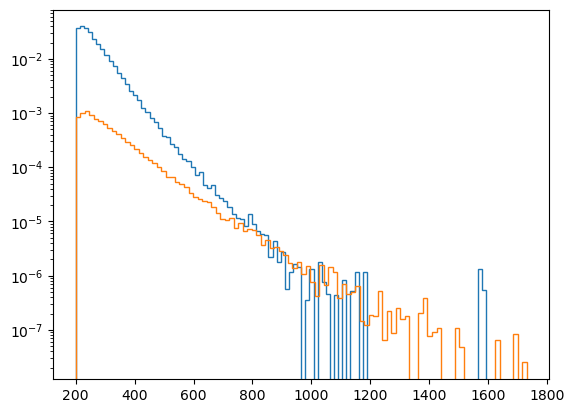

In [15]:
# Print distributions of InputMet_pt with weight nominal

plt.hist(df["InputMet_pt"][df["target"] == 0], bins=100, weights=df["weight_nominal"][df["target"] == 0], histtype='step', label='nominal', log=True)
plt.hist(df["InputMet_pt"][df["target"] == 1], bins=100, weights=df["weight_nominal"][df["target"] == 1], histtype='step', label='nominal', log=True)

## 2. MODEL

Transformer architecture
1. embedding layer
2. encoder block (3)
3. class block (3)
4. dnn layers (3) Gelu-Gelu-Sigmoid

In [12]:
# Now we look at the embedding method in the transformer.py file 

from transformer import AnalysisObjectTransformer, Embedding

# Embedding features into higher dimension using Embedding() class
# This is a neural network based embedding technique. def __init__(self, input_dim, embed_dims, normalize_input=True, activation=nn.GELU)
# Starts with linear layer mapping input_dims=6 to embed_dims=64 by default, we can use any number of embed_dims eg [32,64,128] layers

# Does it somehow embed the 10 jets 6 features into a higher dimension space? So 6x10 features to 64? Why not just flatten?
# Test performance differnce to flatten method 

print(X.shape) 

torch.Size([574539, 10, 6])


### Embedding

In [13]:
# Exploring the embedding method class
import torch.nn as nn
 
class Embedding(nn.Module):
    def __init__(self, input_dim, embed_dims, normalize_input=True, activation=nn.GELU):
        # In the transformer class we say that 
        # input_dim = train_X.shape[-1],   # Which is 6 as shape = (batch, 10, 6)
        # embed_dims = [64], 

        super().__init__()
        if not isinstance(embed_dims,(tuple,list)):
            embed_dims = [embed_dims]
        assert len(embed_dims) >= 1

        self.input_bn = nn.BatchNorm1d(input_dim) if normalize_input else None

        layers = [
            nn.Linear(input_dim,embed_dims[0]),
            activation(),
        ]
        for dim_in,dim_out in zip(embed_dims[:-1],embed_dims[1:]):
            layers.append(nn.Linear(dim_in,dim_out))
            layers.append(activation()) 
        self.layers = nn.Sequential(*layers)

        self.dim = embed_dims[-1]

    def forward(self, x):
        if self.input_bn is not None:
            # x: (batch, seq_len, embed_dim)
            # batch norm expects (batch, embed_dim, sequence length)
            x = self.input_bn(x.permute(0,2,1).contiguous()).permute(0,2,1).contiguous()

        return self.layers(x)
    
x = torch.randn(5,10,6) # batch x jets x features
print(x.shape)
embedding = Embedding(input_dim=6, embed_dims=[64])
x_new = embedding(x)
print(x_new.shape) # Dont quite understand the point of embedding features that contain all the data to higher dimension space

torch.Size([5, 10, 6])
torch.Size([5, 10, 64])


### Attention Blocks

In [14]:
class AttBlock(nn.Module):
    def __init__(self, embed_dim, expansion_factor=2, num_heads=8, activation=nn.GELU, dropout=0):
        super(AttBlock, self).__init__()

        self.num_heads = num_heads
        self.layer_norm1 = nn.LayerNorm(embed_dim)
        self.multihead_attention = nn.MultiheadAttention(
            embed_dim = embed_dim,
            num_heads = num_heads,
            dropout = dropout,
            batch_first = True,
        )
        self.layer_norm2 = nn.LayerNorm(embed_dim) # Each normalisation layer has learnable parameters so we need differnent one between steps
        self.layer_norm3 = nn.LayerNorm(embed_dim)
        self.linear1 = nn.Linear(embed_dim, embed_dim * expansion_factor)
        self.activation = activation()
        self.layer_norm4 = nn.LayerNorm(embed_dim * expansion_factor)
        self.linear2 = nn.Linear(embed_dim * expansion_factor, embed_dim)

    def forward(self, x, x_cls=None, padding_mask=None, attn_mask=None):
        # Class token provided -> concat to do the class attention #
        if x_cls is not None:
            x = torch.cat((x_cls, x), dim=1)  # (batch, seq_len+1, embed_dim) This adds a class token to the input sequence (extra jet almost)
            if padding_mask is not None:
                # Need to add mask=False for cls token
                padding_mask = torch.concat(
                    (
                        torch.full((padding_mask.shape[0],1),fill_value=False).to(x.device),
                        padding_mask,
                    ),
                    dim = 1,
                )
        # Layer normalization 1
        x = self.layer_norm1(x)
        # Multihead Attention
        if attn_mask is not None:
            # Ensure mask has the correct shape for attention
            # Repeat for each head
            attn_mask = attn_mask.repeat(self.num_heads,1,1)
        if x_cls is not None:
            x_att, _ = self.multihead_attention(x_cls, x, x, key_padding_mask=padding_mask, attn_mask=attn_mask) # if class then, query = class token
        else:
            x_att, _ = self.multihead_attention(x, x, x, key_padding_mask=padding_mask, attn_mask=attn_mask)
        # Layer normalization 2
        x_att = self.layer_norm2(x_att)
        # Skip connection
        if x_cls is not None:
            x = x_cls + x_att # Skip connection
        else:
            x = x + x_att
        # Layer normalization 3
        x = self.layer_norm3(x)
        # Linear layer 1 #
        x_linear = self.activation(self.linear1(x))
        # Layer normalization 4
        x_linear = self.layer_norm4(x_linear)
        # Linear layer 2
        x_linear = self.linear2(x_linear)
        # Final skip connection #
        x = x + x_linear
        return x

## Looking at data for W multiclass

In [ ]:
y_multi = torch.load('/home/pk21271/prep_data/ttH_ttbar_Zjets/y.pt')